# CV CW1

The data set for the coursework is a sample from Stallkamp et al's German Street Sign Recognition
Benchmark. Originally the data set consisted of 39,209 RGB-coloured train and 12,630 RGB-coloured
test images of different sizes displaying 43 different types of German traffic signs. These images are
not centred and are taken during different times of the day.

This data set is considered to be an important benchmark for Computer Vision and has close relation
to the street sign recognition tasks that autonomous cars have to perform. And safe deployment of
autonomous cars is the next big challenge that researchers and engineers face.

You will be working with a sample of this data set which consists of 10 classes and 9690 images. The
images have been converted to grey-scale with pixel values ranging from 0 to 255 and were rescaled
to a common size of 48*48 pixels. Hence, each row (= feature vector) in the data set has 2305
features and represents a single image in row-vector format (2304 features) plus its associated class
label. We changed the class labels from the original dataset so the classes we use are now labelled
from 0 to 9. Compensating the light conditions and position of the images is not necessary for the
coursework and is left for the interested student to do.

Below, the class labels and their meanings are displayed:
Class label Meaning
0 speed limit 20
1 speed limit 30
2 speed limit 50
3 speed limit 60
4 speed limit 70
5 left turn
6 right turn
7 beware pedestrian crossing
8 beware children
9 beware cycle route ahead

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [6]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

In [7]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
#read the attribute csvs file into respective dataframes

X = pd.read_csv ('x_train_gr_smpl.csv')
Xbin = pd.read_csv('x_train_smpl_bin.csv')
print (X)
print(Xbin)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...   2294  2295  2296   2297  2298  2299  2300   2301   

In [58]:
# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']
print(Y)

      Class
0         0
1         0
2         0
3         0
4         0
...     ...
9685      9
9686      9
9687      9
9688      9
9689      9

[9690 rows x 1 columns]


In [114]:
# read the class attribute file into Y datafram
Y0 = pd.read_csv('y_train_smpl_0.csv')
Y0.columns = ['Class']
print(Y0)

      Class
0         0
1         0
2         0
3         0
4         0
...     ...
9685      1
9686      1
9687      1
9688      1
9689      1

[9690 rows x 1 columns]


In [115]:
XY0raw = pd.concat([X,Y0], axis=1)

#check the concatination
print(XY0raw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [59]:
#join the two such that Y is the last column

XYraw = pd.concat([X,Y], axis=1)

#check the concatination
print(XYraw)



          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [8]:
#explore the header
XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0


In [9]:
# general info on attributes 
XYraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2305 entries, 0 to Class
dtypes: float64(2304), int64(1)
memory usage: 170.4 MB


In [10]:
# instance frequency for each class attribute label
XYraw["Class"].value_counts()

2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
5     210
0     210
Name: Class, dtype: int64

In [11]:
print(XYraw.shape)

(9690, 2305)


In [12]:
print(X.shape)

(9690, 2304)


In [13]:
# check for NaNs
anyNans = XYraw.isnull().sum().sum()
#print NaN count
print('\nNaN Count : ' + str(anyNans)) 


NaN Count : 0


In [54]:
# generate dataframe with top 20 attributes selected using weka for each class label 

Top_20_All = XYraw[['744',
'745',
'792',
'742',
'747',
'741',
'697',
'698',
'1214',
'2018',
'2068',
'1869',
'1119',
'648',
'2062',
'2019',
'1676',
'2111',
'1120',
'1820','1168',
'1167',
'1120',
'1215',
'1216',
'1119',
'1263',
'1073',
'1264',
'1072',
'1121',
'1166',
'1214',
'1262',
'1074',
'697',
'648',
'744',
'698',
'743',
'1609',
'1656',
'1610',
'1608',
'1658',
'746',
'1314',
'794',
'1315',
'793',
'1561',
'747',
'1311',
'1312',
'1313',
'841',
'1611',
'1316',
'795',
'1267',
'1609',
'1608',
'1656',
'1657',
'1265',
'1313',
'1655',
'1264',
'1312',
'1607',
'1560',
'1658',
'1610',
'1654',
'1561',
'1266',
'1314',
'1704',
'1705',
'1263',
'983',
'1031',
'935',
'982',
'1363',
'2138',
'2268',
'1030',
'2165',
'2024',
'2281',
'1973',
'934',
'2187',
'2069',
'1316',
'2269',
'2209',
'2077',
'2029',
'1509',
'1461',
'1462',
'1508',
'1460',
'744',
'745',
'746',
'1510',
'1557',
'1264',
'1507',
'1556',
'1555',
'1459',
'1263',
'1519',
'1472',
'1216',
'1471',
'793',
'746',
'745',
'744',
'794',
'743',
'792',
'795',
'1264',
'747',
'697',
'742',
'841',
'696',
'1312',
'791',
'1265',
'1263',
'695',
'1311',
'1657',
'1656',
'1608',
'1705',
'1704',
'1703',
'1753',
'1752',
'1601',
'1650',
'1663',
'1662',
'1751',
'1649',
'1600',
'1743',
'1648',
'1651',
'1713',
'1615',
'1695',
'1714',
'1173',
'1125',
'1647',
'1126',
'1713',
'1174',
'1715',
'1666',
'1078',
'1696',
'1743',
'1221',
'1077',
'1472',
'1762',
'1694',
'1742',
'1665',
'1655',
'1654',
'1560',
'1561',
'1606',
'1607',
'1610',
'1559',
'1611',
'1653',
'1558',
'1605',
'1511',
'1562',
'1660',
'1512',
'1604',
'1462',
'1600',
'1601',


                    'Class'
]]

In [55]:
# confirm 201- top 20 attributes x 10 class label + class attriute
print(Top_20_All.shape)

(9690, 201)


In [56]:
#remove any coumn dulplicates

Top_20_WithoutDuplicates = Top_20_All.loc[:,~Top_20_All.T.duplicated(keep='first')]


In [57]:
# confirm removal of column duplicated

print(Top_20_WithoutDuplicates.shape)

(9690, 140)


In [69]:
#randomize

Top_20_WithoutDuplicates_randomized = Top_20_WithoutDuplicates.sample(frac=1).reset_index(drop=True)
print(Top_20_WithoutDuplicates_randomized)

        744    745    792    742    747    741    697    698   1214   2018  \
0     134.0  132.0  124.0  135.0  132.0  134.0  137.0  136.0   55.0   28.0   
1      45.0   47.0   60.0   45.0   39.0   41.0   31.0   30.0   35.0   20.0   
2     147.0  148.0  146.0  150.0  147.0  151.0  144.0  143.0  128.0   25.0   
3     123.0  123.0  122.0  123.0  123.0  122.0  123.0  123.0  120.0   60.0   
4      75.0   75.0   75.0   77.0   43.0   76.0   75.0   76.0   77.0   37.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  128.0   60.0  187.0  199.0   64.0   95.0   52.0   55.0   63.0   58.0   
9686  118.0  121.0   97.0  110.0  119.0  108.0  125.0  124.0   90.0   28.0   
9687   85.0   82.0   93.0   70.0   71.0   63.0   60.0   55.0   68.0   44.0   
9688  139.0  150.0  197.0  115.0  128.0  107.0  109.0  107.0  135.0  126.0   
9689  255.0  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0   41.0   

      ...   1559   1653   1558   1605   1511   1562   1660   15

In [73]:
#convert the dataframe into csv

Top_20_WithoutDuplicates.to_csv('Top_20_random3.csv', index = False)

In [72]:
#create dataframe with top 5 attributes for each class label 

Top_5_All = XYraw[['744',
'745',
'792',
'742',
'747', 
                   '1168',
'1167',
'1120',
'1215',
'1216',
                   '1609',
'1656',
'1610',
'1608',
'1658',
'1609',
'1608',
'1656',
'1657',
'1265',
                   '983',
'1031',
'935',
'982',
'1363',
                   '1509',
'1461',
'1462',
'1508',
'1460',

'793',
'746',
'745',
'744',
'794',
                   
'1657',
'1656',
'1608',
'1705',
'1704',
                   '1695',
'1714',
'1173',
'1125',
'1647',
                   '1655',
'1654',
'1560',
'1561',
'1606',


                   

                   


                    'Class'
]]

In [75]:
# confirm selection
print(Top_5_All.shape)

(9690, 51)


In [76]:
#remove duplicates
Top_5_WithoutDuplicates = Top_5_All.loc[:,~Top_5_All.T.duplicated(keep='first')]

In [77]:
#confirm duplicate removal
print(Top_5_WithoutDuplicates.shape)

(9690, 43)


In [86]:
#randomize
Top_5_WithoutDuplicates_randomized = Top_5_WithoutDuplicates.sample(frac=1).reset_index(drop=True)
print(Top_5_WithoutDuplicates_randomized)

        744    745    792    742    747   1168   1167   1120   1215   1216  \
0     255.0  255.0  255.0  255.0  255.0  254.0  255.0  253.0  255.0  255.0   
1     128.0  128.0  127.0  124.0  125.0  124.0  125.0  124.0  124.0  123.0   
2      68.0   68.0   67.0   67.0   67.0   70.0   70.0   69.0   68.0   68.0   
3      67.0   67.0   58.0   65.0   83.0   50.0   49.0   49.0   50.0   52.0   
4     122.0  120.0  174.0  113.0  107.0  238.0  207.0  226.0  223.0  243.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   23.0   22.0   36.0   21.0   21.0   47.0   32.0   44.0   34.0   49.0   
9686   94.0   94.0   95.0   97.0   94.0   89.0   95.0   88.0   95.0   91.0   
9687  106.0   68.0  145.0   73.0   54.0   97.0  107.0  104.0  108.0   77.0   
9688  121.0  120.0  110.0  121.0  118.0   84.0   82.0   71.0   94.0   96.0   
9689   58.0   56.0   60.0   57.0   40.0   51.0   59.0   54.0   58.0   44.0   

      ...   1714   1173   1125   1647   1655   1654   1560   15

In [87]:
#save datafram as csv for further weka analyses

Top_5_WithoutDuplicates.to_csv('Top_5_random3.csv', index = False)

In [88]:
#create dataframe with top 10 attributes for each class label

Top_10_All = XYraw[['744',
'745',
'792',
'742',
'747', 
      '741',
'697',
'698',
'1214',
'2018',
              
                    
                    
                   '1168',
'1167',
'1120',
'1215',
'1216',
                    
                    '1119',
'1263',
'1073',
'1264',
'1072',

                   '1609',
'1656',
'1610',
'1608',
'1658',
    '746',
'1314',
'794',
'1315',
'793',
              
'1609',
'1608',
'1656',
'1657',
'1265',
     '1313',
'1655',
'1264',
'1312',
'1607',
 
                   '983',
'1031',
'935',
'982',
'1363',
    '2138',
'2268',
'1030',
'2165',
'2024',
 
                   '1509',
'1461',
'1462',
'1508',
'1460',
       '744',
'745',
'746',
'1510',
'1557',

'793',
'746',
'745',
'744',
'794',
                    '743',
'792',
'795',
'1264',
'747',

                   
'1657',
'1656',
'1608',
'1705',
'1704',
       '1703',
'1753',
'1752',
'1601',
'1650',

                   '1695',
'1714',
'1173',
'1125',
'1647',
       '1126',
'1713',
'1174',
'1715',
'1666',
             
                   '1655',
'1654',
'1560',
'1561',
'1606',

'1607',
'1610',
'1559',
'1611',
'1653',

                    'Class'
]]

In [89]:
# confirm the attribute selection
print(Top_10_All.shape)

(9690, 101)


In [92]:
# remove duplicates

Top_10_WithoutDuplicates = Top_10_All.loc[:,~Top_10_All.T.duplicated(keep='first')]
print(Top_10_WithoutDuplicates)

        744    745    792    742    747    741    697    698   1214   2018  \
0     106.0  103.0  180.0  103.0   87.0   95.0   85.0   86.0  168.0  123.0   
1     164.0  163.0  221.0  123.0  138.0  108.0  114.0  108.0   95.0  122.0   
2     197.0  198.0  234.0  196.0  175.0  168.0  145.0  146.0  147.0  118.0   
3     237.0  233.0  244.0  235.0  205.0  214.0  209.0  192.0  167.0  136.0   
4      85.0   85.0  148.0   78.0   79.0   76.0   71.0   71.0  162.0  169.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   82.0   33.0  100.0   96.0   19.0   23.0   23.0   19.0   21.0   59.0   
9686   96.0   38.0  102.0  104.0   19.0   62.0   28.0   18.0   19.0   40.0   
9687   92.0   34.0  101.0  101.0   18.0   68.0   26.0   18.0   17.0   41.0   
9688   94.0   38.0   92.0   94.0   16.0   60.0   27.0   16.0   16.0   35.0   
9689   83.0   26.0   88.0   91.0   15.0   52.0   19.0   15.0   14.0   37.0   

      ...   1715   1666   1654   1560   1561   1606   1559   16

In [93]:
#confirm duplicate removal 
print(Top_10_WithoutDuplicates.shape)

(9690, 80)


In [104]:
#randomize
Top_10_WithoutDuplicates_randomized = Top_10_WithoutDuplicates.sample(frac=1).reset_index(drop=True)
print(Top_10_WithoutDuplicates_randomized)

        744    745    792    742    747    741    697    698   1214   2018  \
0     203.0  172.0  223.0  231.0  159.0  204.0  160.0  156.0  113.0  199.0   
1     115.0  113.0  114.0  110.0  107.0  105.0   96.0   92.0   90.0   43.0   
2      19.0   14.0   28.0   39.0   22.0   31.0   15.0   20.0   18.0   13.0   
3     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  136.0   
4     255.0  255.0  255.0  255.0  230.0  255.0  192.0  206.0  251.0   35.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   66.0   66.0   72.0   65.0   62.0   62.0   59.0   59.0   41.0  145.0   
9686   38.0   38.0   37.0   36.0   37.0   38.0   38.0   38.0   36.0   19.0   
9687  157.0  155.0  156.0  161.0  150.0  159.0  155.0  154.0  162.0  106.0   
9688  162.0  165.0  184.0  155.0  148.0  143.0  136.0  128.0  120.0   79.0   
9689  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   48.0   

      ...   1715   1666   1654   1560   1561   1606   1559   16

In [105]:
#save dataframe as csv for further weka analyses
Top_10_WithoutDuplicates.to_csv('Top_10_random2.csv', index = False)

In [106]:
#create top 20 attributes from exploratory feature selection analyses

Top_20_Exploratory = XYraw[['792',
'742',
'747',
'741',
'697',
'698',
'1214',
'2068',
'1869',
'1119',
'648',
'1676',
'2111',
'1120',
'2067',
'2260',
'2162',
'2301',
'2212',
'2210',
                            '1168',
'1167',
'1120',
'1263',
'1073',
'1072',
'1121',
'1074',
'1310',
'599',
    '1314',
'1315',
'1316',
'1268',
'1264',
'1030',
'1364',
'981',
'982',
'1317',
'1269',
   '1265',
'1313',
'1312',
'1266',
'1217',
'1361',
'1218',
'1219',
'1170',
'1171',
'1220',
'1172',
       '983',
'1031',
'935',
'982',
'1030',
'934',
      '1509',
'1461',
'1462',
'1508',
'1460',
'745',
'746',
'1507',
'1459',
'1519',
'1471',
'1458',
'794',
'1792',
'1126',
'1793',
'1173',
'1842',
'1840',
'1843',
    '793',
'746',
'745',
'794',
'795',
'1264',
'1134',
'842',
'1086',
'1168',
'1085',
'1037',
'1135',
'843',
'1234',
    '1601',
'1663',
'1649',
'1600',
'1743',
'1648',
'1713',
'1714',
'1744',
'1518',
'1507',
'1695',
'1470',
'1519',
'1742',
'1760',
'1459',
'1506',
'1761',
'1517',
     '1695',
'1714',
'1173',
'1125',
'1713',
'1715',
'1666',
'1743',
'1762',
'1742',
'1667',
'1471',
     '1606',
'1558',
'1511',
'1462',
'1600',
'1601',
'1510',
'1649',
'1648',
'706',
'1505',
'707',
'1553',
'560',
'1506',
'1125',
'1647',
'1030',
'1172',
'2174',
  
                            'Class'
]]

In [107]:
# confirm selection - note: not all attributes have 20 features selected 
print(Top_20_Exploratory.shape)

(9690, 147)


In [108]:
#remove duplicates
Top_20_Exploratory_WithoutDuplicates = Top_20_Exploratory.loc[:,~Top_20_Exploratory.T.duplicated(keep='first')]
print(Top_20_Exploratory_WithoutDuplicates)

        792    742    747    741    697    698   1214   2068  1869   1119  \
0     180.0  103.0   87.0   95.0   85.0   86.0  168.0  117.0  79.0  202.0   
1     221.0  123.0  138.0  108.0  114.0  108.0   95.0  137.0  79.0  117.0   
2     234.0  196.0  175.0  168.0  145.0  146.0  147.0  127.0  79.0  201.0   
3     244.0  235.0  205.0  214.0  209.0  192.0  167.0  121.0  80.0  199.0   
4     148.0   78.0   79.0   76.0   71.0   71.0  162.0  135.0  75.0  163.0   
...     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
9685  100.0   96.0   19.0   23.0   23.0   19.0   21.0   56.0  30.0   20.0   
9686  102.0  104.0   19.0   62.0   28.0   18.0   19.0   55.0  36.0   18.0   
9687  101.0  101.0   18.0   68.0   26.0   18.0   17.0   49.0  32.0   17.0   
9688   92.0   94.0   16.0   60.0   27.0   16.0   16.0   40.0  27.0   16.0   
9689   88.0   91.0   15.0   52.0   19.0   15.0   14.0   27.0  28.0   15.0   

      ...   1511   1510    706   1505    707   1553    560   1647   2174  \

In [112]:
# randomize
Top_20_Exploratory_WithoutDuplicates_randomized = Top_20_Exploratory_WithoutDuplicates.sample(frac=1).reset_index(drop=True)
print(Top_20_Exploratory_WithoutDuplicates_randomized)

        792    742    747    741    697    698   1214   2068   1869   1119  \
0     142.0  136.0  141.0  130.0  140.0  139.0   79.0  156.0   67.0  123.0   
1     255.0  169.0  123.0  113.0  241.0  156.0  116.0  255.0  255.0   92.0   
2     255.0  255.0  255.0  255.0  245.0  245.0  186.0   24.0   43.0  255.0   
3     215.0  162.0  169.0  153.0  132.0  133.0  250.0  140.0  241.0  247.0   
4     156.0  148.0  157.0  143.0  154.0  156.0   69.0  120.0   25.0   65.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  255.0  255.0  255.0  255.0  253.0  253.0  255.0   83.0   80.0  251.0   
9686   94.0   91.0   90.0   90.0   92.0   91.0   72.0   81.0   32.0   87.0   
9687  253.0  255.0  255.0  253.0  255.0  255.0  167.0   75.0   88.0  212.0   
9688   60.0   55.0   52.0   53.0   44.0   41.0   50.0   18.0   17.0   50.0   
9689   30.0   26.0   41.0   24.0   26.0   38.0   46.0   29.0   45.0   43.0   

      ...   1511   1510    706   1505    707   1553    560   16

In [113]:
# save dataframe as csv for weka analyses
Top_20_Exploratory_WithoutDuplicates_randomized.to_csv('Top_20_Exploratory_random.csv', index = False)

In [9]:
D = pd.read_csv ('Top_20_Exploratory_random.csv')
print(D)

        792    742    747    741    697    698   1214   2068   1869   1119  \
0     142.0  136.0  141.0  130.0  140.0  139.0   79.0  156.0   67.0  123.0   
1     255.0  169.0  123.0  113.0  241.0  156.0  116.0  255.0  255.0   92.0   
2     255.0  255.0  255.0  255.0  245.0  245.0  186.0   24.0   43.0  255.0   
3     215.0  162.0  169.0  153.0  132.0  133.0  250.0  140.0  241.0  247.0   
4     156.0  148.0  157.0  143.0  154.0  156.0   69.0  120.0   25.0   65.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  255.0  255.0  255.0  255.0  253.0  253.0  255.0   83.0   80.0  251.0   
9686   94.0   91.0   90.0   90.0   92.0   91.0   72.0   81.0   32.0   87.0   
9687  253.0  255.0  255.0  253.0  255.0  255.0  167.0   75.0   88.0  212.0   
9688   60.0   55.0   52.0   53.0   44.0   41.0   50.0   18.0   17.0   50.0   
9689   30.0   26.0   41.0   24.0   26.0   38.0   46.0   29.0   45.0   43.0   

      ...   1511   1510    706   1505    707   1553    560   16

In [47]:
A = pd.read_csv ('Top_5_random2.csv')
print(A)

        744    745    792    742    747   1168   1167   1120   1215   1216  \
0     106.0  103.0  180.0  103.0   87.0  224.0  211.0  207.0  220.0  231.0   
1     164.0  163.0  221.0  123.0  138.0  198.0  122.0  183.0  124.0  199.0   
2     197.0  198.0  234.0  196.0  175.0  220.0  189.0  211.0  196.0  225.0   
3     237.0  233.0  244.0  235.0  205.0  233.0  202.0  227.0  206.0  230.0   
4      85.0   85.0  148.0   78.0   79.0  180.0  186.0  178.0  199.0  202.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   82.0   33.0  100.0   96.0   19.0   19.0   20.0   18.0   19.0   22.0   
9686   96.0   38.0  102.0  104.0   19.0   19.0   18.0   18.0   19.0   30.0   
9687   92.0   34.0  101.0  101.0   18.0   18.0   17.0   17.0   18.0   36.0   
9688   94.0   38.0   92.0   94.0   16.0   16.0   16.0   16.0   16.0   25.0   
9689   83.0   26.0   88.0   91.0   15.0   15.0   14.0   15.0   15.0   26.0   

      ...   1714   1173   1125   1647   1655   1654   1560   15

In [71]:
B = pd.read_csv ('Top_10_random2.csv')
print(B)

        744    745    792    742    747    741    697    698   1214   2018  \
0     106.0  103.0  180.0  103.0   87.0   95.0   85.0   86.0  168.0  123.0   
1     164.0  163.0  221.0  123.0  138.0  108.0  114.0  108.0   95.0  122.0   
2     197.0  198.0  234.0  196.0  175.0  168.0  145.0  146.0  147.0  118.0   
3     237.0  233.0  244.0  235.0  205.0  214.0  209.0  192.0  167.0  136.0   
4      85.0   85.0  148.0   78.0   79.0   76.0   71.0   71.0  162.0  169.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   82.0   33.0  100.0   96.0   19.0   23.0   23.0   19.0   21.0   59.0   
9686   96.0   38.0  102.0  104.0   19.0   62.0   28.0   18.0   19.0   40.0   
9687   92.0   34.0  101.0  101.0   18.0   68.0   26.0   18.0   17.0   41.0   
9688   94.0   38.0   92.0   94.0   16.0   60.0   27.0   16.0   16.0   35.0   
9689   83.0   26.0   88.0   91.0   15.0   52.0   19.0   15.0   14.0   37.0   

      ...   1715   1666   1654   1560   1561   1606   1559   16

In [142]:
C = pd.read_csv ('Top_20_random2.csv')
print(C)

        744    745    792    742    747    741    697    698   1214   2018  \
0     106.0  103.0  180.0  103.0   87.0   95.0   85.0   86.0  168.0  123.0   
1     164.0  163.0  221.0  123.0  138.0  108.0  114.0  108.0   95.0  122.0   
2     197.0  198.0  234.0  196.0  175.0  168.0  145.0  146.0  147.0  118.0   
3     237.0  233.0  244.0  235.0  205.0  214.0  209.0  192.0  167.0  136.0   
4      85.0   85.0  148.0   78.0   79.0   76.0   71.0   71.0  162.0  169.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   82.0   33.0  100.0   96.0   19.0   23.0   23.0   19.0   21.0   59.0   
9686   96.0   38.0  102.0  104.0   19.0   62.0   28.0   18.0   19.0   40.0   
9687   92.0   34.0  101.0  101.0   18.0   68.0   26.0   18.0   17.0   41.0   
9688   94.0   38.0   92.0   94.0   16.0   60.0   27.0   16.0   16.0   35.0   
9689   83.0   26.0   88.0   91.0   15.0   52.0   19.0   15.0   14.0   37.0   

      ...   1559   1653   1558   1605   1511   1562   1660   15

In [72]:
A_randomized = A.sample(frac=1).reset_index(drop=True)

In [73]:
B_randomized = B.sample(frac=1).reset_index(drop=True)

In [144]:
C_randomized = C.sample(frac=1).reset_index(drop=True)

In [10]:
D_randomized = D.sample(frac=1).reset_index(drop=True)

In [74]:
print(A_randomized)

        744    745    792    742    747   1168   1167   1120   1215   1216  \
0      76.0   73.0  117.0   79.0   62.0  208.0  212.0  197.0  228.0  216.0   
1      72.0   71.0   74.0  120.0  113.0  108.0   74.0   82.0   76.0  126.0   
2     215.0  216.0  216.0  217.0  218.0  209.0  215.0  212.0  215.0  212.0   
3     245.0  253.0  255.0  254.0  233.0  254.0  254.0  250.0  255.0  255.0   
4      41.0   40.0   40.0   42.0   39.0   42.0   41.0   41.0   41.0   42.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   45.0   48.0   66.0   50.0   53.0   45.0   33.0   42.0   33.0   45.0   
9686  198.0  172.0  218.0  220.0  152.0  146.0  105.0  122.0  117.0  171.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688   21.0   21.0   20.0   21.0   20.0   21.0   20.0   21.0   20.0   20.0   
9689  233.0  225.0  226.0  197.0  142.0  223.0  224.0  220.0  223.0  224.0   

      ...   1714   1173   1125   1647   1655   1654   1560   15

In [75]:
print(B_randomized)

        744    745    792    742    747    741    697    698   1214   2018  \
0     164.0  166.0  156.0  161.0  163.0  161.0  167.0  166.0  148.0   28.0   
1     249.0  248.0  248.0  247.0  236.0  245.0  250.0  251.0  241.0  253.0   
2     156.0  159.0  155.0  160.0  162.0  159.0  160.0  160.0  157.0   23.0   
3      90.0   92.0   89.0   90.0   92.0   89.0   91.0   91.0   71.0   27.0   
4     221.0  225.0  243.0  219.0  204.0  204.0  171.0  166.0  255.0   39.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  166.0  169.0  189.0  153.0  159.0  140.0  137.0  131.0  110.0   37.0   
9686   68.0   63.0   60.0   68.0   56.0   68.0   72.0   71.0   41.0   25.0   
9687  100.0  100.0  103.0  103.0  101.0   97.0  101.0  101.0   51.0   22.0   
9688   77.0   78.0   66.0   72.0   48.0   86.0   81.0   73.0   69.0   55.0   
9689  154.0  153.0  152.0  153.0  152.0  154.0  154.0  151.0  151.0  154.0   

      ...   1715   1666   1654   1560   1561   1606   1559   16

In [145]:
print(C_randomized) 

        744    745    792    742    747    741    697    698   1214   2018  \
0      38.0   25.0   40.0   40.0   17.0   28.0   19.0   17.0   20.0   28.0   
1      42.0   43.0   36.0   39.0   49.0   39.0   42.0   46.0   39.0  225.0   
2     255.0  255.0  255.0  255.0  255.0  254.0  254.0  249.0  255.0   70.0   
3     164.0  163.0  162.0  159.0  159.0  157.0  156.0  154.0  155.0  209.0   
4      48.0   50.0  102.0   45.0   42.0   45.0   43.0   40.0   85.0   28.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   34.0   33.0   39.0   33.0   30.0   32.0   23.0   22.0   33.0   11.0   
9686  136.0  137.0  136.0  137.0  136.0  136.0  131.0  129.0  126.0  143.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  127.0   
9688   98.0  101.0  114.0   92.0   93.0   78.0   60.0   59.0   64.0   46.0   
9689  157.0  158.0  211.0  164.0  101.0  150.0   92.0   79.0  204.0   37.0   

      ...   1559   1653   1558   1605   1511   1562   1660   15

In [16]:
print(D_randomized) 

        792    742    747    741    697    698   1214   2068   1869   1119  \
0     117.0  198.0   78.0  197.0   43.0   58.0   56.0   84.0   66.0   55.0   
1     178.0  189.0  199.0  188.0  198.0  197.0  170.0   45.0   70.0  182.0   
2      71.0   32.0   39.0   31.0   27.0   28.0   30.0   52.0   22.0   28.0   
3      44.0   37.0   38.0   35.0   25.0   25.0   17.0   14.0   13.0   30.0   
4      57.0   55.0   53.0   53.0   49.0   47.0   54.0  186.0  185.0   57.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  255.0  255.0  255.0  255.0  255.0  255.0  255.0   67.0   75.0  255.0   
9686  150.0  145.0  153.0  136.0  152.0  153.0  155.0   31.0   58.0  158.0   
9687  233.0   95.0   88.0  100.0  136.0  102.0  242.0   42.0   47.0  255.0   
9688  254.0  245.0  252.0  243.0  205.0  199.0  206.0   21.0   46.0  238.0   
9689  250.0   78.0   94.0  119.0  161.0  102.0  242.0  255.0  255.0  251.0   

      ...   1511   1510    706   1505    707   1553    560   16

In [76]:
B_randomized.describe()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,125.463055,124.093189,132.633333,120.565738,119.066873,115.796285,113.814241,112.488235,110.943034,69.816718,...,65.810423,77.287203,130.587203,136.417441,135.354180,131.138700,132.056553,132.224768,125.818266,3.148607
std,76.319759,76.530594,75.153805,76.688047,76.541369,76.585076,76.484526,76.412060,76.250810,64.217608,...,47.783970,55.796508,75.556268,73.589699,73.731462,74.006799,73.179806,74.342174,75.485332,2.177158
min,7.000000,5.000000,8.000000,9.000000,5.000000,6.000000,5.000000,5.000000,5.000000,4.000000,...,4.000000,5.000000,9.000000,12.000000,12.000000,11.000000,11.000000,7.000000,8.000000,0.000000
25%,59.000000,57.000000,66.000000,55.000000,54.000000,52.000000,50.000000,48.250000,48.000000,27.000000,...,31.000000,34.000000,66.000000,74.250000,73.000000,68.000000,70.000000,69.000000,61.000000,1.000000
50%,110.000000,109.000000,121.000000,102.000000,101.000000,95.000000,93.500000,91.000000,89.000000,45.000000,...,53.000000,62.000000,117.000000,125.000000,123.000000,118.000000,119.000000,119.000000,111.000000,3.000000
75%,184.000000,183.000000,194.000000,179.000000,175.000000,170.000000,166.000000,164.000000,163.000000,86.000000,...,87.000000,106.000000,192.000000,196.000000,195.000000,191.000000,188.000000,192.000000,184.000000,4.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


In [77]:
A_randomized.describe()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,125.463055,124.093189,132.633333,120.565738,119.066873,112.842002,113.899897,111.068421,115.070175,117.006914,...,69.429825,93.662745,96.072652,87.346646,134.297833,130.587203,136.417441,135.354180,131.138700,3.148607
std,76.319759,76.530594,75.153805,76.688047,76.541369,75.457465,75.845408,74.151891,76.906898,76.843335,...,50.842278,63.462087,62.802525,64.680782,75.679938,75.556268,73.589699,73.731462,74.006799,2.177158
min,7.000000,5.000000,8.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,...,4.000000,5.000000,4.000000,5.000000,9.000000,9.000000,12.000000,12.000000,11.000000,0.000000
25%,59.000000,57.000000,66.000000,55.000000,54.000000,49.000000,51.000000,49.000000,51.000000,52.000000,...,31.000000,43.000000,46.000000,38.000000,69.000000,66.000000,74.250000,73.000000,68.000000,1.000000
50%,110.000000,109.000000,121.000000,102.000000,101.000000,93.000000,93.000000,92.000000,94.000000,98.000000,...,56.000000,77.000000,80.000000,68.000000,123.000000,117.000000,125.000000,123.000000,118.000000,3.000000
75%,184.000000,183.000000,194.000000,179.000000,175.000000,169.000000,169.000000,164.000000,172.000000,177.000000,...,92.000000,131.000000,134.000000,119.000000,198.000000,192.000000,196.000000,195.000000,191.000000,4.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


In [17]:
from sklearn.model_selection import train_test_split

train_setD, test_setD = train_test_split(D, test_size=0.2, random_state=1938)

In [79]:
from sklearn.model_selection import train_test_split

train_setB, test_setB = train_test_split(B, test_size=0.2, random_state=1938)

In [80]:
test_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
4696,55.0,56.0,58.0,55.0,55.0,55.0,49.0,47.0,54.0,29.0,...,18.0,20.0,54.0,54.0,56.0,48.0,50.0,54.0,53.0,3
1341,122.0,123.0,123.0,123.0,118.0,122.0,121.0,123.0,123.0,31.0,...,27.0,44.0,116.0,121.0,122.0,115.0,120.0,121.0,119.0,1
5114,84.0,101.0,122.0,47.0,105.0,35.0,40.0,43.0,39.0,20.0,...,34.0,43.0,130.0,132.0,145.0,133.0,117.0,143.0,105.0,3
8461,51.0,62.0,60.0,38.0,49.0,36.0,52.0,50.0,24.0,27.0,...,37.0,43.0,45.0,77.0,80.0,71.0,80.0,64.0,45.0,6
4273,100.0,99.0,99.0,100.0,99.0,101.0,99.0,101.0,93.0,43.0,...,21.0,48.0,101.0,101.0,99.0,98.0,95.0,104.0,101.0,2


In [18]:
train_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
5212,15.0,15.0,17.0,16.0,16.0,16.0,16.0,7.0,8.0,16.0,...,16.0,15.0,7.0,11.0,6.0,13.0,7.0,6.0,11.0,4
3768,59.0,60.0,61.0,61.0,60.0,60.0,61.0,42.0,57.0,61.0,...,61.0,59.0,30.0,38.0,31.0,56.0,31.0,31.0,42.0,1
4456,121.0,54.0,64.0,108.0,62.0,69.0,63.0,56.0,58.0,51.0,...,202.0,202.0,87.0,198.0,93.0,205.0,70.0,170.0,59.0,5
9250,143.0,80.0,88.0,72.0,55.0,55.0,142.0,96.0,65.0,181.0,...,208.0,165.0,69.0,200.0,72.0,174.0,85.0,92.0,87.0,4
7235,39.0,55.0,63.0,74.0,74.0,74.0,68.0,59.0,56.0,59.0,...,127.0,107.0,46.0,124.0,51.0,135.0,50.0,86.0,83.0,6


In [81]:
test_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
4696,55.0,56.0,58.0,55.0,55.0,55.0,57.0,57.0,57.0,52.0,...,19.0,45.0,52.0,21.0,55.0,54.0,54.0,56.0,48.0,3
1341,122.0,123.0,123.0,123.0,118.0,120.0,120.0,120.0,120.0,120.0,...,29.0,32.0,30.0,53.0,120.0,116.0,121.0,122.0,115.0,1
5114,84.0,101.0,122.0,47.0,105.0,80.0,42.0,76.0,47.0,77.0,...,35.0,53.0,64.0,51.0,139.0,130.0,132.0,145.0,133.0,3
8461,51.0,62.0,60.0,38.0,49.0,30.0,25.0,30.0,25.0,31.0,...,37.0,72.0,68.0,39.0,44.0,45.0,77.0,80.0,71.0,6
4273,100.0,99.0,99.0,100.0,99.0,27.0,53.0,23.0,75.0,54.0,...,28.0,31.0,27.0,77.0,101.0,101.0,101.0,99.0,98.0,2


In [82]:
train_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
5212,30.0,31.0,31.0,33.0,30.0,10.0,14.0,11.0,12.0,13.0,...,10.0,17.0,28.0,19.0,31.0,31.0,32.0,33.0,32.0,3
3768,138.0,139.0,140.0,140.0,140.0,52.0,95.0,50.0,102.0,56.0,...,29.0,44.0,86.0,41.0,129.0,129.0,127.0,131.0,122.0,2
4456,181.0,185.0,215.0,143.0,162.0,200.0,199.0,200.0,204.0,202.0,...,51.0,92.0,181.0,56.0,217.0,214.0,199.0,211.0,189.0,2
9250,24.0,24.0,26.0,30.0,27.0,21.0,17.0,22.0,18.0,24.0,...,69.0,34.0,30.0,26.0,53.0,51.0,55.0,69.0,44.0,8
7235,42.0,42.0,81.0,33.0,35.0,42.0,28.0,42.0,27.0,41.0,...,20.0,86.0,84.0,22.0,28.0,30.0,79.0,75.0,39.0,4


In [83]:
train_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
5212,30.0,31.0,31.0,33.0,30.0,34.0,31.0,32.0,23.0,187.0,...,12.0,11.0,31.0,32.0,33.0,32.0,32.0,31.0,32.0,3
3768,138.0,139.0,140.0,140.0,140.0,139.0,136.0,133.0,133.0,16.0,...,32.0,32.0,129.0,127.0,131.0,122.0,113.0,131.0,130.0,2
4456,181.0,185.0,215.0,143.0,162.0,106.0,87.0,85.0,147.0,33.0,...,66.0,53.0,214.0,199.0,211.0,189.0,164.0,206.0,210.0,2
9250,24.0,24.0,26.0,30.0,27.0,26.0,20.0,21.0,15.0,17.0,...,62.0,68.0,51.0,55.0,69.0,44.0,42.0,59.0,69.0,8
7235,42.0,42.0,81.0,33.0,35.0,29.0,29.0,28.0,28.0,19.0,...,19.0,20.0,30.0,79.0,75.0,39.0,74.0,39.0,31.0,4


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1938)

In [147]:
for train_index, test_index in split.split(C_randomized, C_randomized["Class"]):
    strat_train_setC = C_randomized.loc[train_index]
    strat_test_setC = C_randomized.loc[test_index]

In [127]:
for train_index, test_index in split.split(B_randomized, B_randomized["Class"]):
    strat_train_setB = B_randomized.loc[train_index]
    strat_test_setB = B_randomized.loc[test_index]
    

In [86]:
for train_index, test_index in split.split(A_randomized, A_randomized["Class"]):
    strat_train_set = A_randomized.loc[train_index]
    strat_test_set = A_randomized.loc[test_index]
    

In [20]:
for train_index, test_index in split.split(D_randomized, D_randomized["Class"]):
    strat_train_setD = D_randomized.loc[train_index]
    strat_test_setD = D_randomized.loc[test_index]

In [87]:
strat_train_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
7982,126.0,125.0,125.0,122.0,119.0,62.0,110.0,81.0,96.0,49.0,...,18.0,26.0,63.0,23.0,117.0,116.0,120.0,119.0,117.0,3
5559,145.0,148.0,114.0,146.0,158.0,107.0,132.0,102.0,140.0,128.0,...,32.0,102.0,76.0,71.0,159.0,158.0,158.0,155.0,155.0,2
7323,156.0,158.0,157.0,158.0,155.0,152.0,154.0,154.0,153.0,151.0,...,45.0,36.0,58.0,58.0,150.0,150.0,148.0,152.0,138.0,1
7791,42.0,43.0,42.0,42.0,43.0,28.0,39.0,34.0,35.0,21.0,...,41.0,31.0,40.0,41.0,44.0,43.0,43.0,44.0,40.0,3
7045,157.0,129.0,198.0,207.0,147.0,130.0,136.0,130.0,133.0,133.0,...,243.0,245.0,244.0,240.0,192.0,128.0,228.0,130.0,201.0,8


In [128]:
print(strat_train_setB.shape)
print(strat_train_set.shape)

(7752, 80)
(7752, 43)


In [21]:
print(strat_train_setD.shape)

(7752, 120)


In [22]:
# check for NaNs
anyNans = strat_test_setD.isnull().sum().sum()
anyNans = strat_train_setD.isnull().sum().sum()
#print NaN count
print('\nNaN Count : ' + str(anyNans)) 


NaN Count : 0


In [19]:
# check for NaNs
anyNans = test_setD.isnull().sum().sum()
anyNans = train_setD.isnull().sum().sum()
#print NaN count
print('\nNaN Count : ' + str(anyNans)) 



NaN Count : 0


In [109]:
strat_train_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
7845,31.0,31.0,44.0,26.0,29.0,22.0,19.0,19.0,27.0,32.0,...,21.0,17.0,36.0,45.0,45.0,42.0,45.0,43.0,32.0,3
5465,255.0,255.0,246.0,255.0,255.0,255.0,255.0,255.0,255.0,160.0,...,63.0,147.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
7394,114.0,112.0,113.0,112.0,96.0,112.0,80.0,66.0,114.0,62.0,...,71.0,45.0,111.0,116.0,114.0,116.0,116.0,113.0,111.0,1
7716,41.0,46.0,54.0,35.0,40.0,28.0,18.0,18.0,38.0,13.0,...,26.0,16.0,58.0,59.0,58.0,60.0,59.0,59.0,56.0,3
7574,95.0,51.0,165.0,46.0,54.0,41.0,42.0,42.0,123.0,67.0,...,41.0,61.0,193.0,201.0,98.0,165.0,212.0,84.0,170.0,8


In [149]:
strat_train_setC.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1559,1653,1558,1605,1511,1562,1660,1512,1604,Class
7872,24.0,23.0,38.0,22.0,19.0,20.0,17.0,15.0,36.0,18.0,...,43.0,27.0,40.0,34.0,38.0,43.0,23.0,41.0,31.0,3
5537,255.0,255.0,255.0,255.0,255.0,254.0,254.0,253.0,255.0,77.0,...,254.0,255.0,239.0,253.0,253.0,253.0,255.0,255.0,234.0,2
7489,211.0,211.0,210.0,212.0,194.0,213.0,207.0,206.0,212.0,255.0,...,187.0,202.0,113.0,140.0,131.0,214.0,207.0,197.0,103.0,1
7715,47.0,46.0,55.0,47.0,41.0,38.0,27.0,26.0,51.0,23.0,...,48.0,49.0,40.0,38.0,41.0,31.0,47.0,45.0,34.0,3
7191,108.0,144.0,150.0,79.0,113.0,114.0,90.0,95.0,122.0,73.0,...,195.0,138.0,131.0,116.0,183.0,182.0,178.0,223.0,134.0,8


In [89]:
strat_test_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
6088,42.0,43.0,43.0,39.0,43.0,39.0,29.0,39.0,31.0,39.0,...,15.0,38.0,37.0,15.0,42.0,42.0,44.0,43.0,41.0,4
5256,122.0,125.0,123.0,120.0,127.0,122.0,120.0,120.0,120.0,120.0,...,62.0,53.0,47.0,37.0,107.0,99.0,124.0,126.0,119.0,1
9283,248.0,192.0,253.0,250.0,52.0,65.0,54.0,53.0,55.0,113.0,...,255.0,255.0,255.0,255.0,249.0,239.0,251.0,130.0,135.0,8
908,218.0,199.0,248.0,192.0,209.0,255.0,253.0,255.0,255.0,255.0,...,132.0,231.0,237.0,108.0,255.0,255.0,255.0,255.0,255.0,2
8804,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,116.0,245.0,189.0,255.0,255.0,255.0,255.0,255.0,255.0,1


In [121]:
strat_test_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
6085,243.0,217.0,252.0,203.0,220.0,158.0,168.0,169.0,160.0,27.0,...,83.0,154.0,188.0,255.0,255.0,228.0,255.0,250.0,160.0,4
5117,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,60.0,...,94.0,230.0,255.0,255.0,255.0,255.0,246.0,255.0,255.0,1
9287,138.0,107.0,165.0,54.0,36.0,38.0,73.0,42.0,97.0,77.0,...,157.0,173.0,159.0,164.0,132.0,124.0,138.0,151.0,151.0,8
846,101.0,100.0,102.0,101.0,102.0,99.0,101.0,101.0,99.0,136.0,...,32.0,34.0,107.0,105.0,106.0,107.0,104.0,105.0,107.0,2
8829,128.0,126.0,126.0,128.0,124.0,126.0,125.0,128.0,127.0,41.0,...,24.0,48.0,121.0,121.0,120.0,121.0,121.0,119.0,121.0,1


In [66]:
strat_train_set.to_csv('Top_5_train_set.csv', index = False)

In [67]:
strat_test_set.to_csv('Top_5_test_set.csv', index = False)

In [122]:
strat_train_set[['Class']] = strat_train_set[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])


In [130]:
strat_train_setB[['Class']] = strat_train_setB[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [150]:
strat_train_setC[['Class']] = strat_train_setC[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [23]:
strat_train_setD[['Class']] = strat_train_setD[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [20]:
train_setD[['Class']] = train_setD[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

/home/rachana/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [133]:
strat_train_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
7845,31.0,31.0,44.0,26.0,29.0,22.0,19.0,19.0,27.0,32.0,...,21.0,17.0,36.0,45.0,45.0,42.0,45.0,43.0,32.0,three
5465,255.0,255.0,246.0,255.0,255.0,255.0,255.0,255.0,255.0,160.0,...,63.0,147.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,two
7394,114.0,112.0,113.0,112.0,96.0,112.0,80.0,66.0,114.0,62.0,...,71.0,45.0,111.0,116.0,114.0,116.0,116.0,113.0,111.0,one
7716,41.0,46.0,54.0,35.0,40.0,28.0,18.0,18.0,38.0,13.0,...,26.0,16.0,58.0,59.0,58.0,60.0,59.0,59.0,56.0,three
7574,95.0,51.0,165.0,46.0,54.0,41.0,42.0,42.0,123.0,67.0,...,41.0,61.0,193.0,201.0,98.0,165.0,212.0,84.0,170.0,eight


In [21]:
train_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
5212,15.0,15.0,17.0,16.0,16.0,16.0,16.0,7.0,8.0,16.0,...,16.0,15.0,7.0,11.0,6.0,13.0,7.0,6.0,11.0,four
3768,59.0,60.0,61.0,61.0,60.0,60.0,61.0,42.0,57.0,61.0,...,61.0,59.0,30.0,38.0,31.0,56.0,31.0,31.0,42.0,one
4456,121.0,54.0,64.0,108.0,62.0,69.0,63.0,56.0,58.0,51.0,...,202.0,202.0,87.0,198.0,93.0,205.0,70.0,170.0,59.0,five
9250,143.0,80.0,88.0,72.0,55.0,55.0,142.0,96.0,65.0,181.0,...,208.0,165.0,69.0,200.0,72.0,174.0,85.0,92.0,87.0,four
7235,39.0,55.0,63.0,74.0,74.0,74.0,68.0,59.0,56.0,59.0,...,127.0,107.0,46.0,124.0,51.0,135.0,50.0,86.0,83.0,six


In [22]:
test_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
4696,53.0,41.0,41.0,35.0,30.0,30.0,24.0,31.0,51.0,42.0,...,54.0,53.0,36.0,30.0,46.0,22.0,59.0,26.0,34.0,4
1341,250.0,254.0,255.0,254.0,255.0,255.0,255.0,72.0,181.0,230.0,...,164.0,112.0,62.0,153.0,49.0,220.0,50.0,107.0,56.0,2
5114,84.0,83.0,85.0,83.0,83.0,83.0,81.0,74.0,95.0,78.0,...,63.0,44.0,24.0,66.0,29.0,84.0,39.0,30.0,78.0,2
8461,105.0,47.0,74.0,37.0,37.0,37.0,28.0,14.0,15.0,36.0,...,53.0,56.0,53.0,47.0,44.0,37.0,35.0,33.0,14.0,3
4273,87.0,47.0,47.0,44.0,28.0,28.0,60.0,25.0,20.0,76.0,...,92.0,92.0,42.0,79.0,37.0,72.0,28.0,27.0,24.0,4


In [151]:
strat_train_setC.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1559,1653,1558,1605,1511,1562,1660,1512,1604,Class
7872,24.0,23.0,38.0,22.0,19.0,20.0,17.0,15.0,36.0,18.0,...,43.0,27.0,40.0,34.0,38.0,43.0,23.0,41.0,31.0,three
5537,255.0,255.0,255.0,255.0,255.0,254.0,254.0,253.0,255.0,77.0,...,254.0,255.0,239.0,253.0,253.0,253.0,255.0,255.0,234.0,two
7489,211.0,211.0,210.0,212.0,194.0,213.0,207.0,206.0,212.0,255.0,...,187.0,202.0,113.0,140.0,131.0,214.0,207.0,197.0,103.0,one
7715,47.0,46.0,55.0,47.0,41.0,38.0,27.0,26.0,51.0,23.0,...,48.0,49.0,40.0,38.0,41.0,31.0,47.0,45.0,34.0,three
7191,108.0,144.0,150.0,79.0,113.0,114.0,90.0,95.0,122.0,73.0,...,195.0,138.0,131.0,116.0,183.0,182.0,178.0,223.0,134.0,eight


In [24]:
strat_train_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
7917,65.0,40.0,42.0,42.0,40.0,40.0,46.0,36.0,38.0,35.0,...,81.0,81.0,61.0,35.0,63.0,40.0,52.0,42.0,29.0,three
5563,171.0,82.0,111.0,70.0,63.0,66.0,67.0,46.0,40.0,68.0,...,167.0,151.0,70.0,127.0,61.0,94.0,63.0,90.0,205.0,two
7348,255.0,255.0,255.0,253.0,255.0,255.0,238.0,40.0,35.0,245.0,...,176.0,136.0,77.0,143.0,87.0,92.0,101.0,186.0,63.0,one
7729,94.0,94.0,93.0,96.0,94.0,92.0,90.0,17.0,21.0,94.0,...,66.0,26.0,28.0,24.0,22.0,37.0,17.0,70.0,19.0,three
7277,170.0,171.0,98.0,133.0,98.0,100.0,95.0,32.0,32.0,92.0,...,163.0,145.0,30.0,129.0,79.0,161.0,33.0,169.0,45.0,eight


In [42]:
strat_train_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
7949,48.0,49.0,59.0,42.0,45.0,52.0,44.0,53.0,46.0,53.0,...,30.0,22.0,24.0,26.0,42.0,38.0,59.0,58.0,54.0,three
5548,112.0,112.0,116.0,115.0,116.0,111.0,108.0,109.0,108.0,116.0,...,44.0,76.0,55.0,41.0,106.0,102.0,115.0,115.0,115.0,two
7448,254.0,254.0,254.0,254.0,250.0,254.0,255.0,255.0,255.0,254.0,...,74.0,74.0,42.0,200.0,250.0,247.0,249.0,247.0,246.0,one
7777,53.0,55.0,64.0,54.0,45.0,59.0,48.0,61.0,47.0,57.0,...,21.0,48.0,49.0,31.0,30.0,32.0,44.0,42.0,32.0,three
7525,243.0,161.0,253.0,150.0,58.0,58.0,68.0,60.0,61.0,78.0,...,255.0,255.0,255.0,255.0,251.0,225.0,254.0,195.0,198.0,eight


In [41]:
strat_test_set[['Class']] = strat_test_set[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [138]:
strat_test_setB[['Class']] = strat_test_setB[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [152]:
strat_test_setC[['Class']] = strat_test_setC[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [25]:
strat_test_setD[['Class']] = strat_test_setD[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [23]:
test_setD[['Class']] =test_setD[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

/home/rachana/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
strat_test_set.head()

,744,745,792,742,747,1168,1167,1120,1215,1216,...,1714,1173,1125,1647,1655,1654,1560,1561,1606,Class
5890,80.0,79.0,75.0,79.0,78.0,83.0,76.0,80.0,77.0,83.0,...,28.0,46.0,53.0,23.0,62.0,56.0,81.0,79.0,77.0,four
5370,242.0,248.0,255.0,242.0,253.0,255.0,231.0,255.0,235.0,255.0,...,86.0,199.0,250.0,100.0,255.0,255.0,240.0,255.0,255.0,one
9385,58.0,50.0,77.0,111.0,68.0,69.0,80.0,68.0,71.0,79.0,...,56.0,183.0,204.0,102.0,90.0,95.0,115.0,113.0,117.0,eight
898,227.0,230.0,220.0,223.0,227.0,40.0,63.0,58.0,75.0,74.0,...,52.0,66.0,54.0,207.0,232.0,234.0,236.0,233.0,232.0,two
8880,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,68.0,73.0,65.0,66.0,255.0,255.0,255.0,255.0,255.0,one


In [24]:
test_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
4696,53.0,41.0,41.0,35.0,30.0,30.0,24.0,31.0,51.0,42.0,...,54.0,53.0,36.0,30.0,46.0,22.0,59.0,26.0,34.0,four
1341,250.0,254.0,255.0,254.0,255.0,255.0,255.0,72.0,181.0,230.0,...,164.0,112.0,62.0,153.0,49.0,220.0,50.0,107.0,56.0,two
5114,84.0,83.0,85.0,83.0,83.0,83.0,81.0,74.0,95.0,78.0,...,63.0,44.0,24.0,66.0,29.0,84.0,39.0,30.0,78.0,two
8461,105.0,47.0,74.0,37.0,37.0,37.0,28.0,14.0,15.0,36.0,...,53.0,56.0,53.0,47.0,44.0,37.0,35.0,33.0,14.0,three
4273,87.0,47.0,47.0,44.0,28.0,28.0,60.0,25.0,20.0,76.0,...,92.0,92.0,42.0,79.0,37.0,72.0,28.0,27.0,24.0,four


In [153]:
strat_test_setC.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1559,1653,1558,1605,1511,1562,1660,1512,1604,Class
5993,77.0,77.0,78.0,77.0,72.0,73.0,63.0,60.0,72.0,30.0,...,81.0,78.0,80.0,79.0,81.0,63.0,75.0,78.0,72.0,four
5385,205.0,204.0,206.0,203.0,204.0,207.0,210.0,207.0,213.0,213.0,...,112.0,93.0,42.0,36.0,77.0,178.0,163.0,173.0,33.0,one
9330,107.0,111.0,140.0,31.0,37.0,31.0,73.0,43.0,87.0,24.0,...,129.0,115.0,82.0,72.0,113.0,90.0,127.0,137.0,64.0,eight
875,54.0,54.0,54.0,54.0,50.0,54.0,54.0,54.0,50.0,109.0,...,58.0,57.0,53.0,56.0,53.0,58.0,58.0,56.0,55.0,two
8913,85.0,89.0,152.0,71.0,88.0,60.0,60.0,62.0,109.0,255.0,...,162.0,178.0,141.0,163.0,130.0,194.0,206.0,157.0,154.0,one


In [140]:
strat_test_setB.head()

,744,745,792,742,747,741,697,698,1214,2018,...,1715,1666,1654,1560,1561,1606,1559,1611,1653,Class
6085,243.0,217.0,252.0,203.0,220.0,158.0,168.0,169.0,160.0,27.0,...,83.0,154.0,188.0,255.0,255.0,228.0,255.0,250.0,160.0,four
5117,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,60.0,...,94.0,230.0,255.0,255.0,255.0,255.0,246.0,255.0,255.0,one
9287,138.0,107.0,165.0,54.0,36.0,38.0,73.0,42.0,97.0,77.0,...,157.0,173.0,159.0,164.0,132.0,124.0,138.0,151.0,151.0,eight
846,101.0,100.0,102.0,101.0,102.0,99.0,101.0,101.0,99.0,136.0,...,32.0,34.0,107.0,105.0,106.0,107.0,104.0,105.0,107.0,two
8829,128.0,126.0,126.0,128.0,124.0,126.0,125.0,128.0,127.0,41.0,...,24.0,48.0,121.0,121.0,120.0,121.0,121.0,119.0,121.0,one


In [26]:
strat_test_setD.head()

,792,742,747,741,697,698,1214,2068,1869,1119,...,1511,1510,706,1505,707,1553,560,1647,2174,Class
5991,255.0,255.0,255.0,254.0,255.0,255.0,255.0,49.0,201.0,255.0,...,255.0,230.0,102.0,255.0,99.0,255.0,99.0,125.0,59.0,four
5286,68.0,47.0,48.0,42.0,30.0,29.0,41.0,27.0,62.0,52.0,...,72.0,67.0,73.0,37.0,77.0,34.0,79.0,51.0,79.0,one
9413,120.0,54.0,66.0,51.0,85.0,70.0,47.0,32.0,37.0,42.0,...,168.0,138.0,39.0,180.0,39.0,190.0,45.0,107.0,64.0,eight
739,125.0,72.0,133.0,49.0,71.0,87.0,145.0,94.0,101.0,94.0,...,125.0,111.0,47.0,98.0,48.0,109.0,63.0,99.0,86.0,two
8851,76.0,73.0,74.0,73.0,74.0,73.0,71.0,63.0,47.0,70.0,...,68.0,66.0,46.0,44.0,51.0,55.0,56.0,51.0,57.0,one


In [45]:
strat_train_set.to_csv('Top_5_train_set_nom.csv', index = False)

In [46]:
strat_test_set.to_csv('Top_5_test_set_nom.csv', index = False)

In [135]:
strat_train_setB.to_csv('Top_10_train_set_nom.csv', index = False)

In [141]:
strat_test_setB.to_csv('Top_10_test_set_nom.csv', index = False)

In [154]:
strat_train_setC.to_csv('Top_20_train_set_nom.csv', index = False)

In [20]:
strat_test_setC.to_csv('Top_20_test_set_nom.csv', index = False)

NameError: name 'strat_test_setC' is not defined

In [27]:
strat_train_setD.to_csv('Top_20_Explo_train_set_nom.csv', index = False)

In [28]:
strat_test_setD.to_csv('Top_20_Explo_test_set_nom.csv', index = False)

In [25]:
train_setD.to_csv('Top_20_Explo_train_set.csv', index = False)

In [26]:
test_setD.to_csv('Top_20_Explo_test_set.csv', index = False)

In [14]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.subplots as tls
import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
X.shape


(9690, 2304)

In [16]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
Xs = X.values
X_std = StandardScaler().fit_transform(Xs)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [17]:
#standardizing the data

from sklearn.preprocessing import StandardScaler
Xs = X.values
X_std = StandardScaler().fit_transform(Xs)

mean_vec=np.mean(X_std,axis=0)
cov_mat=np.cov(X_std.T)
eigvalues ,eigvectors =np.linalg.eig(cov_mat)

eigpairs=[(np.abs(eigvalues[i]),eigvectors[:,i] )for i in range(len(eigvalues))]


eigpairs.sort(key=lambda x:x[0],reverse=True)
   
tot=sum(eigvalues)
var_exp=[(i/tot)*100 for i in sorted(eigvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

In [18]:

trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
   
    line = dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
 
     line = dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)


fig.layout.title='explained Variance plots'
fig.layout.xaxis=dict(range=[0,800],title='Feature columns')
fig.layout.yaxis=dict(range=[0,100],title='explained variance')


py.iplot(fig,filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [43]:
pca=PCA(30)
pca.fit(X_std)

PCA(n_components=30)

In [44]:
X_pca=pca.transform(X_std)

In [45]:
X_pca.shape

(9690, 30)

In [46]:
eigenvalues=pca.components_
eigenvalues.shape

(30, 2304)

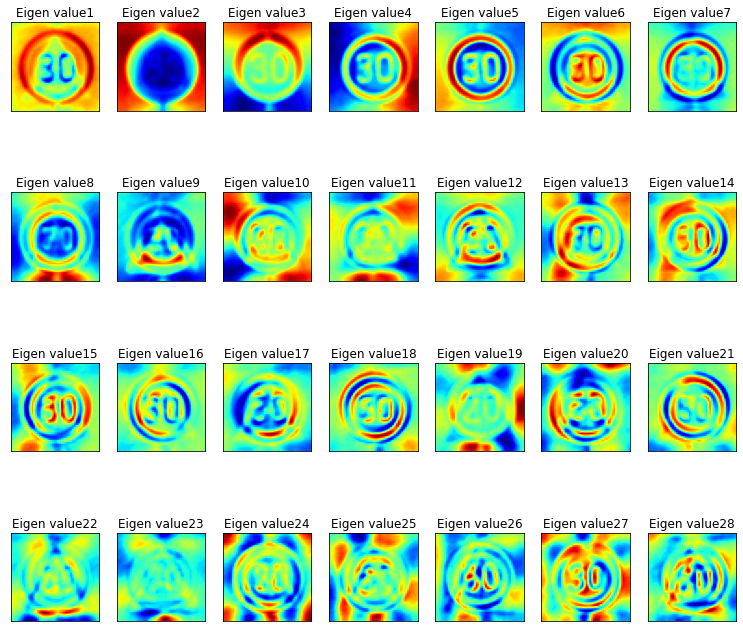

In [47]:
#plotting eigen values
plt.figure(figsize=(13,12))

x_row=4
y_col=7

for i in list(range(x_row*y_col)):
    
    plt.subplot(x_row,y_col,i+1)
    plt.imshow(eigenvalues[i].reshape(48,48),cmap='jet')
    title_='Eigen value'+str(i+1)
    plt.title(title_)
    plt.xticks(())
    plt.yticks(())
plt.show()  

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

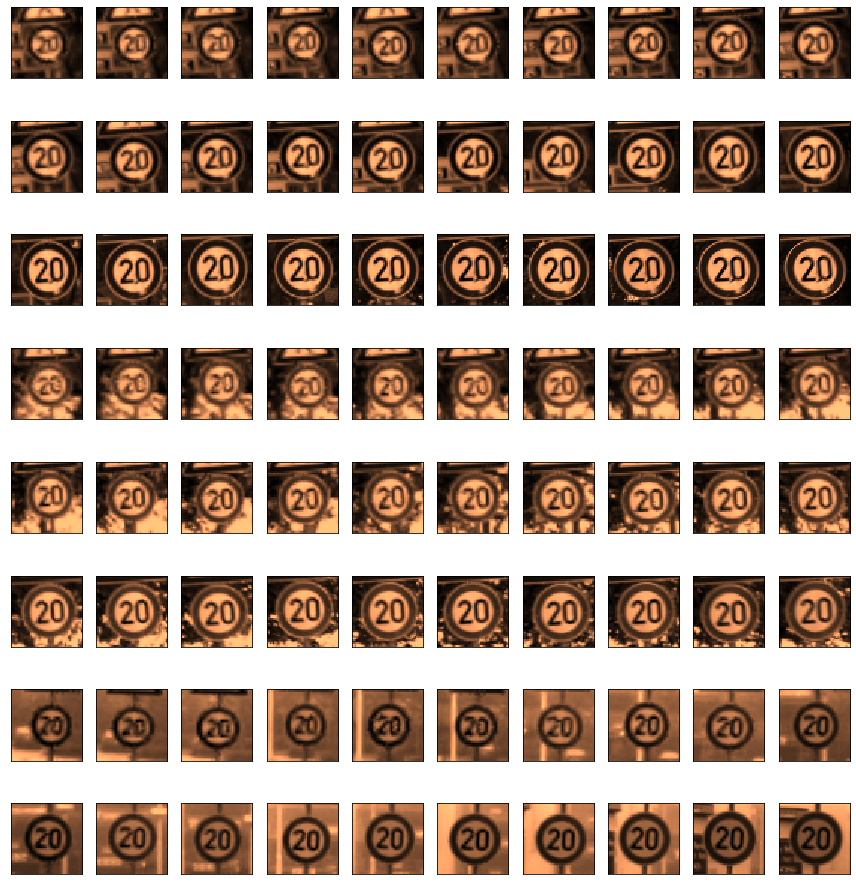

In [55]:
#plotting

plt.figure(figsize=(12,13))

for i in list(range(0,80)):
    plt.subplot(8,10,i+1)
    
    plt.imshow(X.iloc[i].values.reshape(48,48), interpolation = "none", cmap = "copper")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
               
plt.tight_layout

In [66]:
#standardising data and implementing pca

X_=X[:9000].values
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(10)
X_10d=pca_.fit_transform(X_std_)
target = XYraw['Class']
Target=target[:9000]

In [67]:
X_10d.shape

(9000, 10)

In [68]:
eigenvalues_=pca_.components_

In [69]:
eigenvalues_.shape

(10, 2304)

In [70]:
# visualisation of pca representations
trace = go.Scatter(
    x = X_10d[:,0],
    y = X_10d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

In [71]:

from sklearn.cluster import KMeans
kmeans=KMeans(10)
X_clustered=kmeans.fit_predict(X_10d)

In [72]:
tracekmeans = go.Scatter(x=X_10d[:, 0], y= X_10d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))


layout=go.Layout(title='Kmeans clustering',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")